This dataset contains all the TV-shows & movies information from Netflix.

The URL link is https://www.kaggle.com/shivamb/netflix-shows/download; to download it, simply go to the site and click download.

What is the ratio of TV-shows & movies that netflix released?

What is the distribution of the TV-shows & movies release time?

What is the distribution of the country where TV-shows & movies are produced?

Load the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/michael/Documents/Github Desktop/CPA01/netflix_titles.csv')
dc = df.describe()

print(dc)
df.head(5)

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [2]:
pivot = pd.pivot_table(
    data = df,
    values = 'release_year',
    columns = 'country',
    aggfunc = lambda x: x.mode().iat[0],
)
pivot

country       , France, Algeria  , South Korea  Argentina  \
release_year               2014           2021       2020   

country       Argentina, Brazil, France, Poland, Germany, Denmark  \
release_year                                               2017     

country       Argentina, Chile  Argentina, Chile, Peru  Argentina, France  \
release_year              2006                    2015               2017   

country       Argentina, France, United States, Germany, Qatar  \
release_year                                              2017   

country       Argentina, Italy  Argentina, Spain  ...  \
release_year              2017              2017  ...   

country       Uruguay, Argentina, Germany, Spain  Uruguay, Argentina, Spain  \
release_year                                2004                       2018   

country       Uruguay, Germany  Uruguay, Guatemala  Uruguay, Spain, Mexico  \
release_year              2021                2019                    2018   

country       Venezuela  Venezuela, Colombia  Vietnam  West Germany  Zimbabwe  
release_year       2017                 2007     2019          1977      2017  

[1 rows x 748 columns]

From the pivot table above, by calculating the mode, we can see that the year in which every country releases the greatest amount of TV-shows & movies.

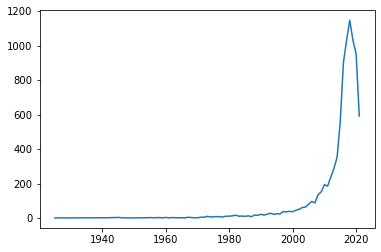

In [3]:
years = df.groupby('release_year').groups
yearsum = {key:len(years[key]) for key in years}
lists = sorted(yearsum.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()

By grouping the movies and shows by their year of production, we can count the total number of releases of any year.

The number of production increased significantly since 2020 and starting to drop after 2019.

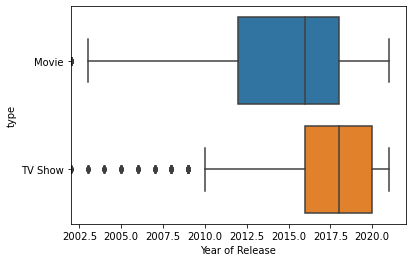

In [4]:
sns.boxplot(data=df, x='release_year' ,y='type')
plt.xlabel('Year of Release')
plt.xlim(2002,2022)
plt.show()

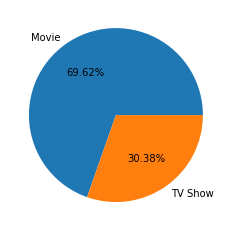

In [5]:
type_value_count = df['type'].value_counts(normalize=True)*100
content_types = df['type'].unique()
plt.pie(type_value_count,labels=content_types,autopct='%1.2f%%')
plt.show()

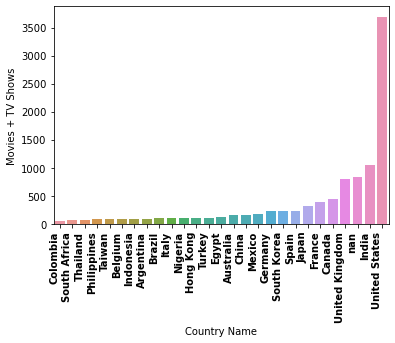

In [6]:
country_list = df['country'].apply(lambda x: str(x).split(',')).tolist()
country_df = pd.DataFrame(country_list,index=df['title'])
country_df = country_df.stack()
country_df = pd.DataFrame(country_df)
country_df.reset_index(inplace = True)
country_df = country_df[['title',0]]
country_df.columns = ['title','country_name']
country_df['country_name'] = country_df['country_name'].str.strip()
df_country = df.merge(country_df, on='title', how='inner')
x = pd.DataFrame(df_country.groupby('country_name')['title'].count())
x.reset_index(inplace = True)
new_data = x[x['title']>50]
sorted_data = new_data.sort_values(by='title')
sns.barplot(x = sorted_data['country_name'], y= sorted_data['title'])
y_pos = np.arange(len(sorted_data))
plt.xticks(color='black', rotation=90, fontweight='bold', fontsize='10', horizontalalignment='right')
plt.xlabel('Country Name')
plt.ylabel('Movies + TV Shows')
plt.show()

From the charts above, we can see that most releases are aggregated from 2012 to 2020.

And the releases were mainly movies, about two times the amount of TV-shows.

For the country of production, the movies and shows were mainly produced in the US.